In [1]:
import katdal
import numpy as np
import pickle

In [2]:
import time

In [3]:
np.set_printoptions(precision=1,suppress=True)

In [4]:
def target(h):
    h.catalogue.remove('Nothing')
    if len(h.catalogue) >0 :
        tgt=str(h.catalogue.targets[0])[0:12]
    else:
        tgt="Nothing:Bad DATA"
    return tgt

In [5]:
def get_ants(h):
    a_list=[]
    aa=h.file['TelescopeState']['cal_antlist']
    for i,ai in enumerate(aa):
        a_list.append(pickle.loads(ai[1]))
    a_array=np.array(a_list)
    labels=a_array[0]
    return labels

In [6]:
def get_ut(f):
    nn=int(f[-13:-3])
    print nn
    ut=time.asctime(time.gmtime(nn))
    return ut

In [7]:
def phases(h):
    g = h.file['TelescopeState']['cal_product_G']
    g_list = []
    for i, gi in enumerate(g):
        g_list.append(pickle.loads(gi[1]))
    g_array = np.array(g_list)
    HH=g_array[:,0,:]
    VV=g_array[:,1,:]
    HHbefore=np.rad2deg(np.angle(HH)[0])
    HHafter=np.rad2deg(np.angle(HH)[-1])
    VVbefore=np.rad2deg(np.angle(VV)[0])
    VVafter=np.rad2deg(np.angle(VV)[-1])
    return HHbefore, HHafter,VVbefore,VVafter

In [8]:
files=['/var/kat/archive2/data/MeerKATAR1/telescope_products/2017/01/06/1483730319.h5',\
      '/var/kat/archive2/data/MeerKATAR1/telescope_products/2017/01/07/1483779531.h5',\
      '/var/kat/archive2/data/MeerKATAR1/telescope_products/2017/01/07/1483801850.h5',\
      '/var/kat/archive2/data/MeerKATAR1/telescope_products/2017/01/07/1483831455.h5',\
      '/var/kat/archive2/data/MeerKATAR1/telescope_products/2017/01/08/1483860737.h5',\
      '/var/kat/archive2/data/MeerKATAR1/telescope_products/2017/01/08/1483890271.h5']

In [9]:
Hphases=np.empty([10])
Vphases=np.empty([10])

In [10]:
for f in files:
    h=katdal.open(f)
    p=phases(h)
    print get_ut(f), f[-13:-3], target(h)
    print get_ants(h)
    labels=get_ants(h)
    print p[0],"\n",p[1],"\n\n",p[2],"\n",p[3]
    Hnew=np.vstack((Hphases,p[1]))
    Vnew=np.vstack((Vphases,p[3]))
    Hphases=Hnew
    Vphases=Vnew

1483730319
Fri Jan  6 19:18:39 2017 1483730319 PKS 0408-65 
['m006' 'm007' 'm014' 'm015' 'm021' 'm022' 'm025' 'm031' 'm062' 'm063']
[ 10.2  -2.2   0.3   2.9   7.9   1.8   0.    2.3   1.7   0.3] 
[-35.7 -33.3 -35.1 -28.4 -37.2 -40.1   0.  -35.6 -44.  -28.2] 

[-3.1 -2.8 -0.2  0.4  2.8 -2.4  0.   1.4  2.8  2.7] 
[  1.3 -19.7  11.8   3.2  12.9  -8.6   0.  -10.4  10.6  -6.9]
1483779531
Sat Jan  7 08:58:51 2017 1483779531 PKS 1934-63 
['m006' 'm007' 'm014' 'm015' 'm021' 'm022' 'm025' 'm031' 'm062' 'm063']
[-3.5  1.5  1.8 -1.1 -4.8  0.5  0.  -3.2 -1.5  1. ] 
[-9.6  3.6  0.7 -3.5 -7.6  4.8  0.  -2.4  3.7 -8.6] 

[ 1.   0.2  0.8 -1.1 -0.1 -0.5  0.   0.9 -0.4 -1.9] 
[  2.7  13.9  -3.8   5.1   9.2  15.9   0.   12.7   5.2   9.9]
1483801850
Sat Jan  7 15:10:50 2017 1483801850 PKS 1934-63 
['m006' 'm007' 'm014' 'm015' 'm021' 'm022' 'm025' 'm031' 'm062' 'm063']
[-3.5  1.5  1.8 -1.1 -4.8  0.5  0.  -3.2 -1.5  1. ] 
[-36.2 -20.2 -42.1   0.4 -20.2 -70.7   0.  -46.9 -70.6 -30.4] 

[ 1.   0.2  0.8 -1.1 -0

In [11]:
labels=get_ants(h)

In [12]:
Hphases[1:]

array([[-35.7, -33.3, -35.1, -28.4, -37.2, -40.1,   0. , -35.6, -44. ,
        -28.2],
       [ -9.6,   3.6,   0.7,  -3.5,  -7.6,   4.8,   0. ,  -2.4,   3.7,
         -8.6],
       [-36.2, -20.2, -42.1,   0.4, -20.2, -70.7,   0. , -46.9, -70.6,
        -30.4],
       [-36.2, -20.2, -42.1,   0.4, -20.2, -70.7,   0. , -46.9, -70.6,
        -30.4],
       [-36.2, -20.2, -42.1,   0.4, -20.2, -70.7,   0. , -46.9, -70.6,
        -30.4],
       [-36.2, -20.2, -42.1,   0.4, -20.2, -70.7,   0. , -46.9, -70.6,
        -30.4]])

In [13]:
Vphases[1:]

array([[  1.3, -19.7,  11.8,   3.2,  12.9,  -8.6,   0. , -10.4,  10.6,
         -6.9],
       [  2.7,  13.9,  -3.8,   5.1,   9.2,  15.9,   0. ,  12.7,   5.2,
          9.9],
       [-31.1, -43. , -36.4,  -4.4, -43.9, -42.7,   0. , -95.6, -53.1,
        -44.6],
       [-31.1, -43. , -36.4,  -4.4, -43.9, -42.7,   0. , -95.6, -53.1,
        -44.6],
       [-31.1, -43. , -36.4,  -4.4, -43.9, -42.7,   0. , -95.6, -53.1,
        -44.6],
       [-31.1, -43. , -36.4,  -4.4, -43.9, -42.7,   0. , -95.6, -53.1,
        -44.6]])

In [14]:
import matplotlib.pylab as plt
%matplotlib inline

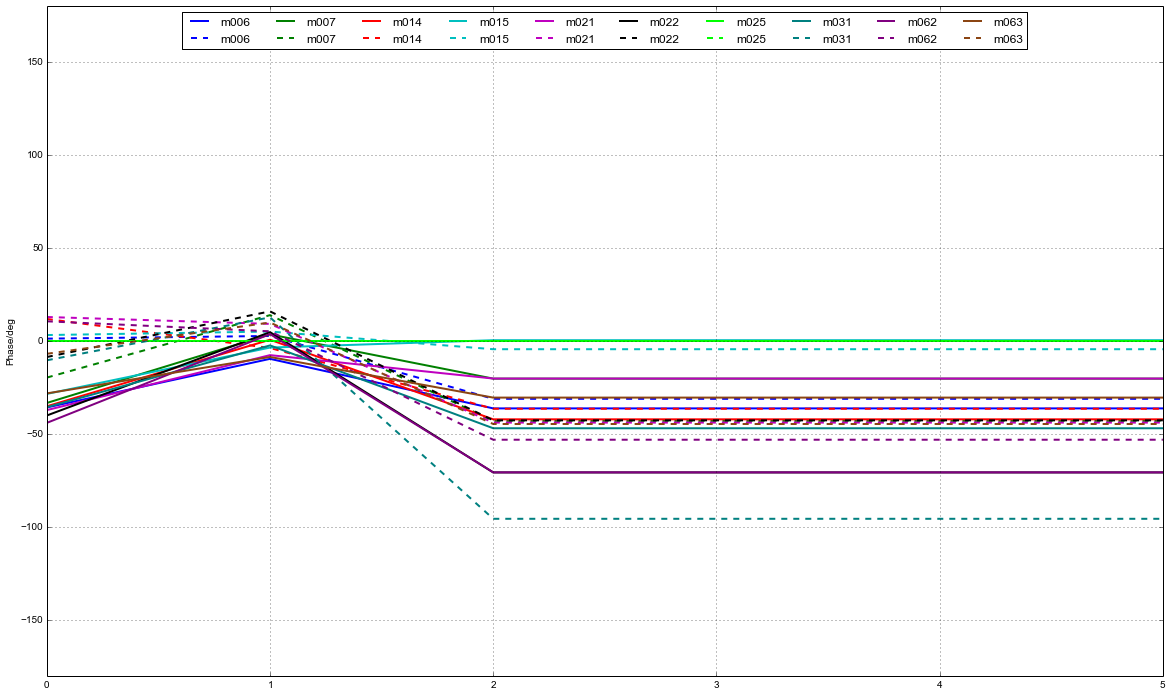

In [15]:
colors=['b','g','r','c','m','k','lime','teal','purple','saddlebrown','grey']
plt.figure(figsize=(20,12))
nants=len(labels)
plt.ylim([-180,180])

for i in range(len(labels)):
    plt.plot(Hphases[1:,i], label=labels[i],color=colors[i],linewidth=2)
    plt.plot(Vphases[1:,i], linestyle='--', label=labels[i],color=colors[i],linewidth=2)
plt.ylabel("Phase/deg")
#plt.xlabel("Time Offset/hours")
plt.legend(loc='upper center',ncol=nants)
plt.grid()

# Between first and third large jump. Then stable